## Homework #3. Crowdsourcing tools review
#### Author: `Anton Pysmennyi`
#### Total time spent on h/w (in minutes): `~200`

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
DIALOGS_MERGED_DATA_PATH = "Enter the path to dialogs_data_all.csv file here"
DIALOGS_META_MERGED_DATA_PATH = "Enter the path to dialogs_users_all.csv file here"

In [3]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH, low_memory=False)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

In [9]:
user_id= "Enter your user id here"
peer_user_id= "PeerUser(user_id="+user_id+")"
groupname = "There should be the name of group used in Task 2.2"

## Task 2.1
## Messages data analysis

In [4]:
df.head(10)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
0,6523,2022-03-25 14:42:12+00:00,NaN,PeerChannel(channel_id=1044917656),NaN,#подкаст\n\n🇺🇦 Що робить українців такими силь...,photo,NaN,-1001044917656
1,6522,2022-03-25 14:37:47+00:00,NaN,PeerChannel(channel_id=1044917656),NaN,#англійська\n\nМіжнародна онлайн-школа All Rig...,photo,NaN,-1001044917656
2,6521,2022-03-25 14:35:03+00:00,NaN,PeerChannel(channel_id=1044917656),NaN,#вебінар\n\nЯк війна росії проти України зміню...,photo,NaN,-1001044917656
3,6520,2022-03-25 14:31:22+00:00,NaN,PeerChannel(channel_id=1044917656),NaN,#англійська\n\n“Диверсант переплутав паляницю ...,photo,NaN,-1001044917656
4,6519,2022-03-24 10:17:41+00:00,NaN,PeerChannel(channel_id=1044917656),NaN,Навчаємося та перемагаємо: «На Урок» оголошує ...,photo,NaN,-1001044917656
5,6518,2022-03-21 17:48:32+00:00,NaN,PeerChannel(channel_id=1044917656),"MessageFwdHeader(date=datetime.datetime(2022, ...","ЗНО, ДПА, єдиний вступний іспит та єдине фахов...",text,NaN,-1001044917656
6,6517,2022-03-21 07:15:54+00:00,NaN,PeerChannel(channel_id=1044917656),NaN,#робота\n\nІНФОРМАЦІЙНА ДОПОМОГА У ПРАЦЕВЛАШТУ...,photo,NaN,-1001044917656
7,6516,2022-03-20 19:03:50+00:00,NaN,PeerChannel(channel_id=1044917656),"MessageFwdHeader(date=datetime.datetime(2022, ...",NaN,photo,NaN,-1001044917656
8,6515,2022-03-20 19:03:50+00:00,NaN,PeerChannel(channel_id=1044917656),"MessageFwdHeader(date=datetime.datetime(2022, ...",NaN,photo,NaN,-1001044917656
9,6514,2022-03-20 19:03:50+00:00,NaN,PeerChannel(channel_id=1044917656),"MessageFwdHeader(date=datetime.datetime(2022, ...",NaN,photo,NaN,-1001044917656


In [5]:
df.shape

(1084984, 9)

In [6]:
min(df["date"]),max(df["date"])

('2016-04-14 16:45:37+00:00', '2022-10-29 19:31:32+00:00')

In [7]:
df.groupby(["type"])["type"].count()

type
photo      173309
sticker     16950
text       849670
video       38598
voice        6457
Name: type, dtype: int64

In [8]:
df.groupby(["type"])["duration"].sum()

type
photo            0.0
sticker          0.0
text             0.0
video      3096818.0
voice       197635.0
Name: duration, dtype: float64

## Tasks to do:

1. Define your telegram ID (https://www.alphr.com/tlegra-find-user-id/).

2. Check on examples that the data you downloaded reflects your telegram messages. Make screenshots (insert your screenshots in this notebook) of 3 different messages in TG and related rows in your dataset here. (Well, obviously, you can skip that)

3. Find the longest audio message you've ever sent; what's its duration? Make its screenshot (insert your screenshots in this notebook).

In [10]:
df1 = df.loc[df["type"]=="voice"]
df2 = df1.loc[df1["from_id"] == peer_user_id]

df2[df2.duration == df2.duration.max()]

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
901144,231538,2022-07-08 05:45:57+00:00,PeerUser(user_id=789230657),982712349,NaN,NaN,voice,259.0,982712349


4. Calculate numbers of send and received(s&r) messages.

In [11]:
df3 = df.loc[df["from_id"]==peer_user_id]
sent = len(df3.index)
print('sent: ')
print(sent)
df4 = df.loc[df["to_id"]==user_id]
recieved = len(df4.index)
print("recieved: ")
print(recieved)

sent: 
141536
recieved: 
139544


5. Draw number of send and received(s&r) messages per day (x-axis - is date(from min(date) till max(date)), y-axis number of messages). There should be two lines: blue for received red for send.

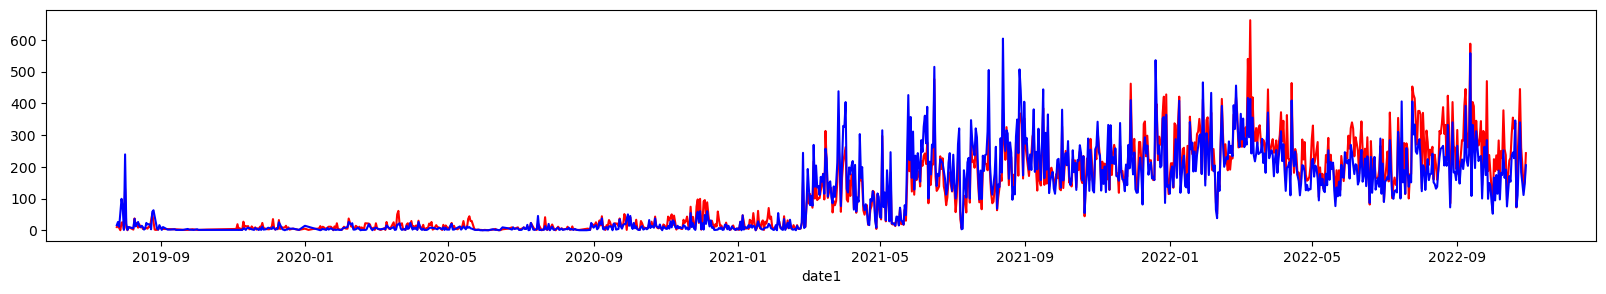

In [12]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df45 = df.loc[df["from_id"]==peer_user_id]
df5 = df45.groupby(['date1'])['message'].count()
df6=df.loc[df["to_id"]==user_id]
df7 = df6.groupby(['date1'])['message'].count()
line1 = df5.plot(figsize = (20,3), color='red')
line2 = df7.plot(figsize=(20,3),color='blue')

6. Draw a few diagrams to show distributions between post types in the time, a diagram showing the total amount of messages of each type.

-stickers: 

<AxesSubplot:title={'center':'stickers'}, xlabel='date1'>

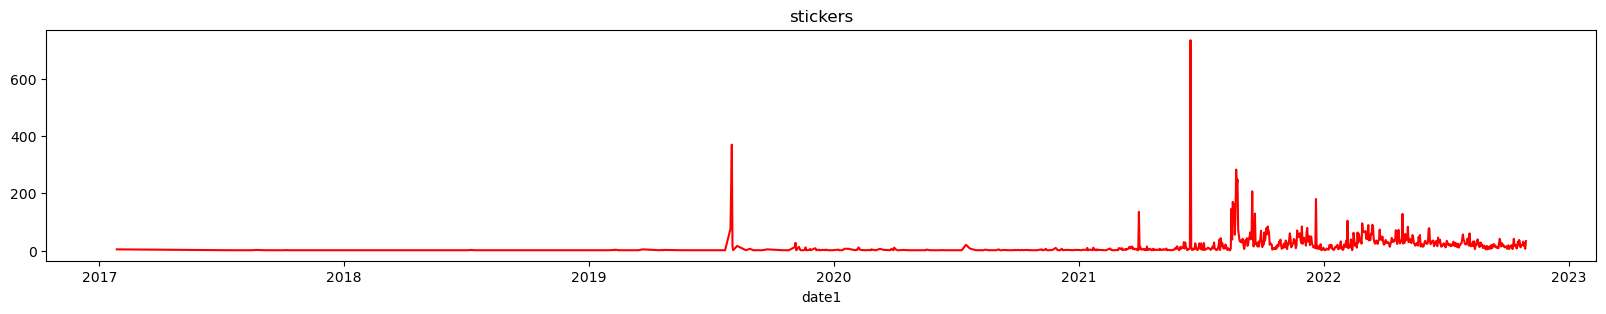

In [13]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df1 = df.loc[df["type"]=="sticker"]
df2 = df1.groupby(['date1'])['type'].count()
df2.plot(figsize = (20,3), color='red', title='stickers')

-voice messages

<AxesSubplot:title={'center':'voice'}, xlabel='date1'>

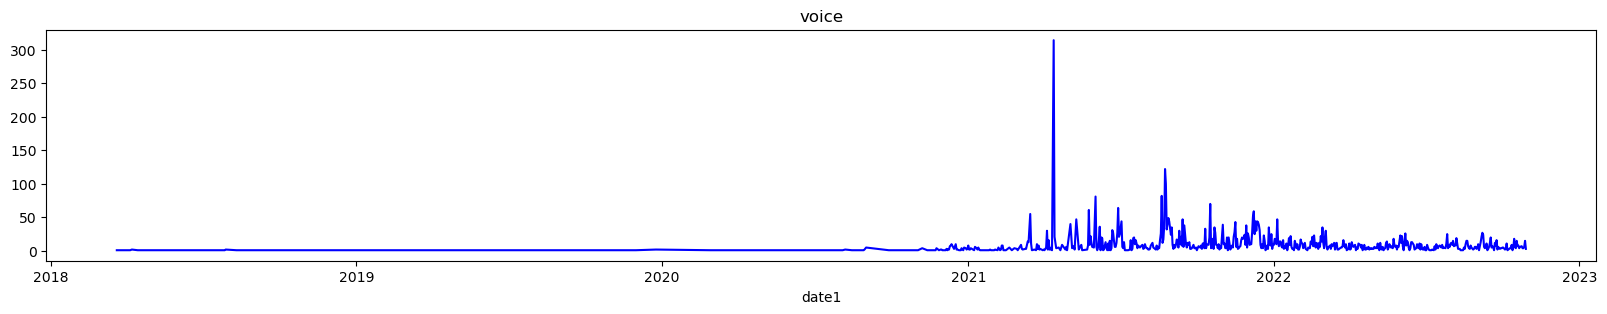

In [14]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df3=df.loc[df["type"]=="voice"]
df4 = df3.groupby(['date1'])['type'].count()
df4.plot(figsize=(20,3), color='blue', title="voice")

-photos

<AxesSubplot:title={'center':'photos'}, xlabel='date1'>

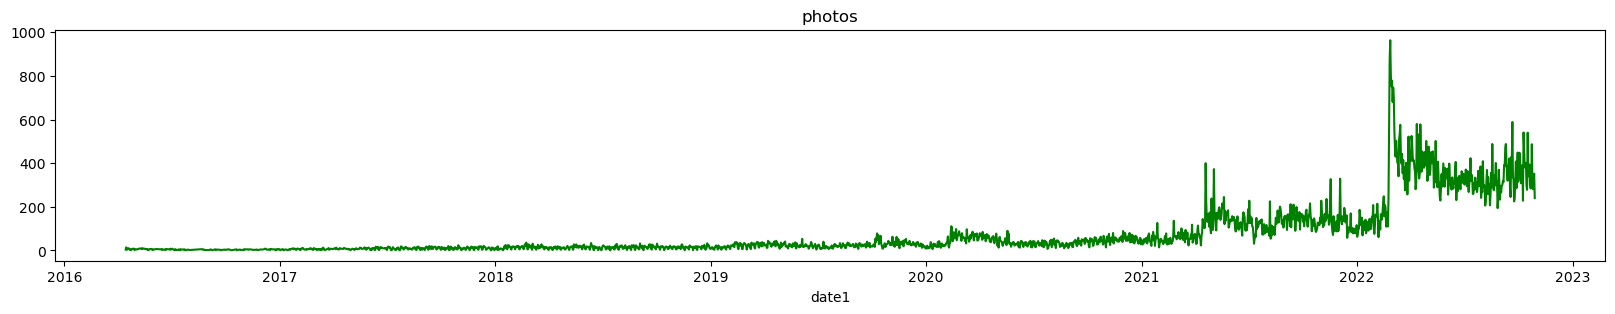

In [15]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df5=df.loc[df["type"]=="photo"]
df6 = df5.groupby(['date1'])['type'].count()
df6.plot(figsize=(20,3), color='green', title = 'photos')

-quantity of messages of each type

<AxesSubplot:xlabel='type'>

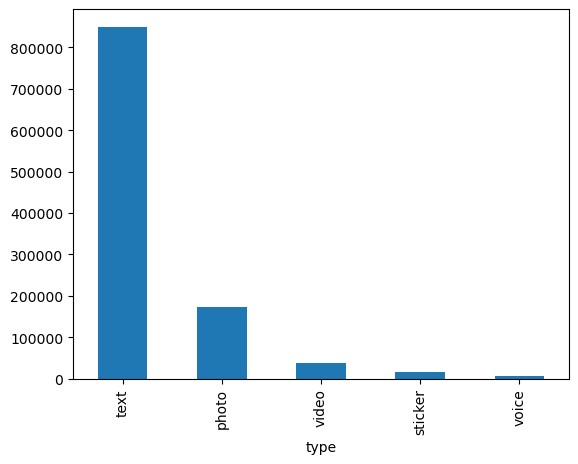

In [16]:
df0=df.groupby(['type'])['type'].count().sort_values(ascending=False).head(10)
df0.plot(kind='bar')

7. Calculate top-10 people to whom you wrote the biggest amount of messages (name, amount of messages).

In [17]:
df11 = df.loc[df["from_id"] == peer_user_id]
df11.groupby(['dialog_id'])['message'].count().sort_values(ascending=False).head(10)

dialog_id
 982712349        112558
-1001448999218      3493
 418467773          3042
 1234060895         1924
 523744317          1437
 945755425          1219
 872023976           845
-1001399652610       761
 120400999           609
 1637518258          529
Name: message, dtype: int64

8. Calculate top-10 people who wrote the biggest amount of messages to you (name, amount of messages).

In [18]:
df12 = df.loc[df["to_id"] == user_id]
df12
df12.groupby(['dialog_id'])['message'].count().sort_values(ascending=False).head(10)


dialog_id
982712349     105986
418467773       3172
1234060895      2757
523744317       2295
945755425       1112
872023976       1071
120400999        916
1637518258       629
643407720        599
621860286        493
Name: message, dtype: int64

## Task 2.2
## Dialogs data analysis

In [19]:
df_meta.shape

(3877, 4)

In [20]:
df_meta.head(10)

,dialog_id,name,type,users
0,-1001174112602,ЕкоКлуб: волонтери 🌱,Group,"{'user_id': 459686352, 'first_name': 'Nastya',..."
1,-1001174112602,ЕкоКлуб: волонтери 🌱,Group,"{'user_id': 340206358, 'first_name': 'марина🥁'..."
2,-1001174112602,ЕкоКлуб: волонтери 🌱,Group,"{'user_id': 373565055, 'first_name': '𓍊𓋼𓍊𓋼𓍊𓆏на..."
3,-1001174112602,ЕкоКлуб: волонтери 🌱,Group,"{'user_id': 554674167, 'first_name': 'поля🧿', ..."
4,-1001174112602,ЕкоКлуб: волонтери 🌱,Group,"{'user_id': 789230657, 'first_name': 'Чучупак'..."
5,-1001174112602,ЕкоКлуб: волонтери 🌱,Group,"{'user_id': 435963418, 'first_name': 'Mariia',..."
6,-1001174112602,ЕкоКлуб: волонтери 🌱,Group,"{'user_id': 472420357, 'first_name': 'Sophiya'..."
7,-1001174112602,ЕкоКлуб: волонтери 🌱,Group,"{'user_id': 491817672, 'first_name': 'Anna', '..."
8,-1001174112602,ЕкоКлуб: волонтери 🌱,Group,"{'user_id': 511747768, 'first_name': 'Kafanova..."
9,-1001174112602,ЕкоКлуб: волонтери 🌱,Group,"{'user_id': 870047277, 'first_name': 'Таїсія',..."


In [21]:
df_meta.groupby(["type"])["type"].count()

type
Group             3726
Private dialog     151
Name: type, dtype: int64

## Tasks to do:

1. Find our TG group. Print its id and list of participants.

In [22]:
df6 = df_meta.loc[df_meta["name"]== groupname]
print("id: ")
print(df6.iloc[2]["dialog_id"])
print("list of participants: ")
print(df6["users"].tolist())

id: 
-1001695031361
list of participants: 
["{'user_id': 789230657, 'first_name': 'Чучупак', 'last_name': None, 'username': 'ZochemNikiMenyat', 'phone': '380980880760'}", "{'user_id': 468240548, 'first_name': 'Бадди', 'last_name': None, 'username': 'wasja_wolk', 'phone': '380630307484'}", "{'user_id': 607186206, 'first_name': 'Juan', 'last_name': 'Camarada', 'username': 'Jan_juan', 'phone': None}", "{'user_id': 387767007, 'first_name': 'Artem', 'last_name': None, 'username': 'artem_myk', 'phone': '380979983347'}", "{'user_id': 358687, 'first_name': 'Årtem', 'last_name': None, 'username': 'weirdGuy', 'phone': None}", "{'user_id': 1326206, 'first_name': 'Grey', 'last_name': 'Smith', 'username': 'GreySmith', 'phone': None}", "{'user_id': 302784024, 'first_name': 'Bogdan', 'last_name': None, 'username': 'Ferdinand_von_SachsenCoburgGotha', 'phone': None}", "{'user_id': 367903709, 'first_name': 'Олександр', 'last_name': 'Румянцев', 'username': 'Homeboy_John', 'phone': None}", "{'user_id': 25

2. Draw distribution of group sizes.

<AxesSubplot:xlabel='name'>

D:\Users\rozetka\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\rozetka\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\rozetka\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


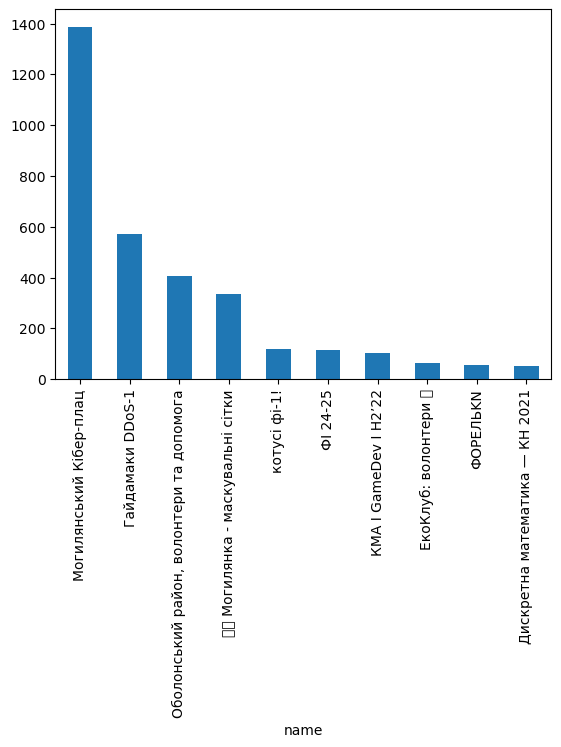

In [23]:
grouped = df_meta.groupby(['name'])['users'].count().sort_values(ascending=False).head(10)
grouped.plot(kind='bar')

3. Calculate top-10 the biggest groups/channels.

In [24]:
def get_top (df_meta : pd.DataFrame): 
    grouped = df_meta.groupby(['name'])['users'].count().sort_values(ascending=False).head(10)
    
    return grouped

get_top(df_meta)

name
Могилянський Кібер-плац                     1386
Гайдамаки DDoS-1                             571
Оболонський район, волонтери та допомога     405
🇺🇦 Могилянка - маскувальні сітки             335
котусі фі-1!                                 120
ФІ 24-25                                     113
КМА І GameDev І Н2’22                        101
ЕкоКлуб: волонтери 🌱                          63
ФОРЕЛЬKN                                      57
Дискретна математика — КН 2021                53
Name: users, dtype: int64

4. Calculate the number of distinct user names you are connected to through any type of dialogue.

In [25]:
def get_top2 (df_meta : pd.DataFrame): 
    grouped = df_meta.groupby(['name'])['users'].count().sort_values(ascending=False).head(10)
    
    return grouped.sum()

get_top2(df_meta)

3204